In [52]:
import pandas as pd
import os

In [53]:
os.getcwd()

'C:\\Users\\beefm\\Jupyter\\Jupyter Notebooks'

In [54]:
movies = pd.read_csv('C:\\Users\\beefm\\Jupyter\\Homework Sections\\Movie-Ratings.csv')

In [55]:
len(movies)

559

In [56]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [57]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [58]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [59]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [61]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [62]:
###Year needs to be a categorical value, not a numeric

In [63]:
movies.Film = movies.Film.astype('category')

In [64]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [65]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 27.4+ KB


In [66]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [67]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [68]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [69]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Jointplots

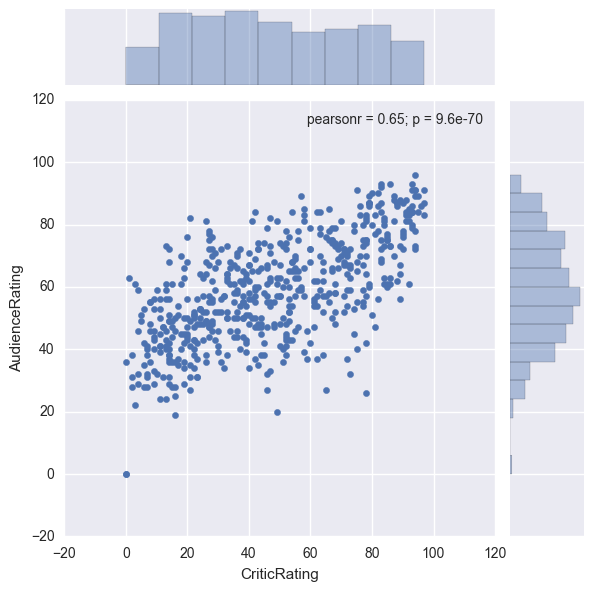

In [72]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

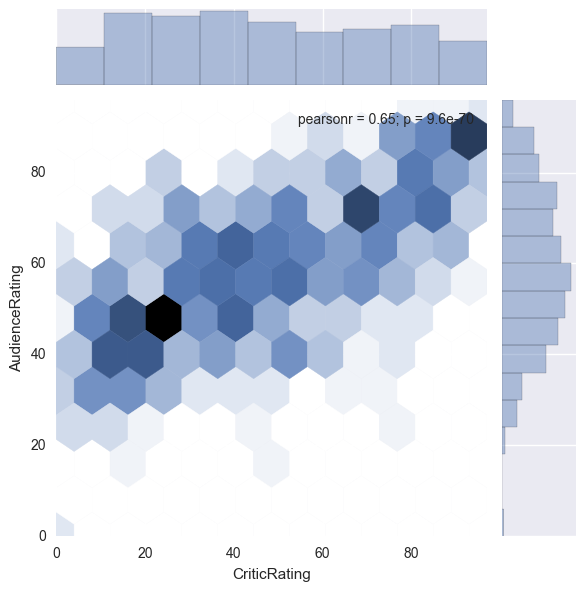

In [73]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

In [74]:
#Chart 1

In [75]:
####Histograms

TypeError: slice indices must be integers or None or have an __index__ method

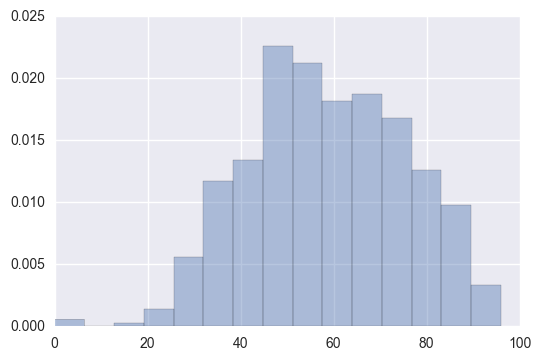

In [76]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

TypeError: slice indices must be integers or None or have an __index__ method

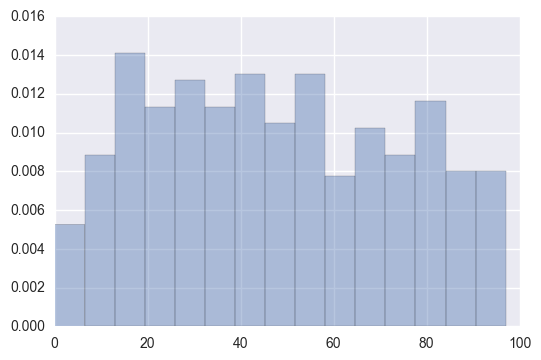

In [77]:
m2 = sns.distplot(movies.CriticRating, bins=15)

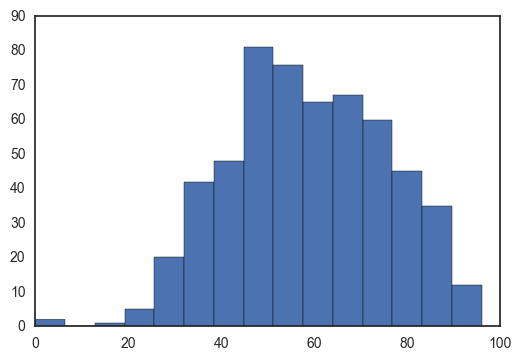

In [82]:
# Chart 2 sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins=15)

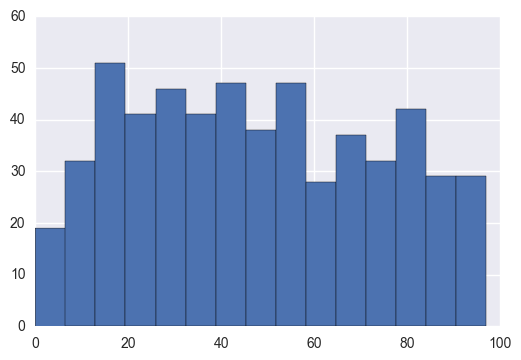

In [85]:
####Chart 3
sns.set_style("darkgrid")
n1 = plt.hist(movies.CriticRating, bins=15)

In [86]:
###Stacked Histograms (Hit tab to fill)

<function matplotlib.pyplot.show>

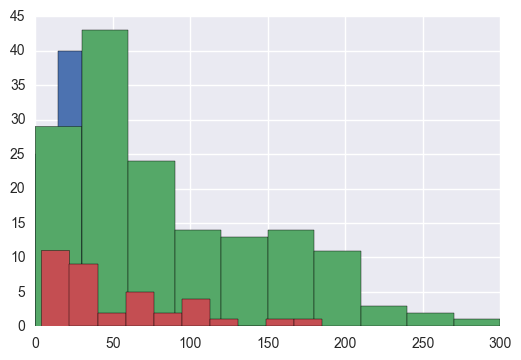

In [100]:
##Running a filter
# movies.Genre == 'Drama'
# movies[movies.Genre == 'Drama'].BudgetMillions
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show

<function matplotlib.pyplot.show>

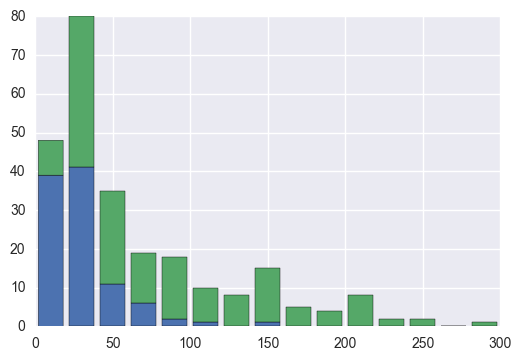

In [104]:
plt.hist([movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Action'].BudgetMillions], \
         bins =15, stacked=True)
plt.show


In [105]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


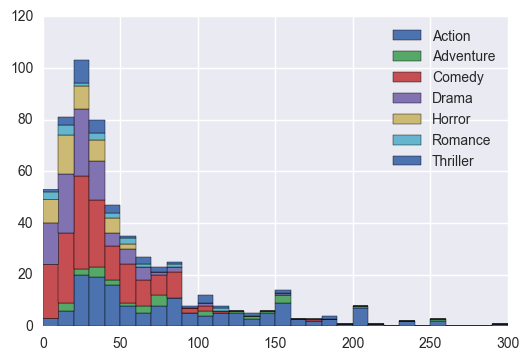

In [111]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

In [112]:
###Kernal Density Estimate Plot

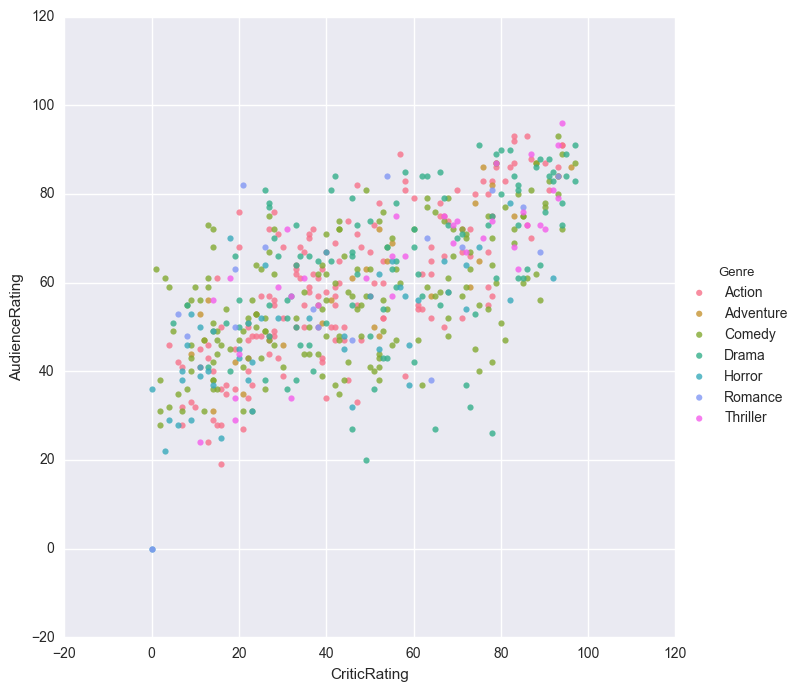

In [113]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                 fit_reg=False, hue='Genre', \
                 size=7, aspect=1)

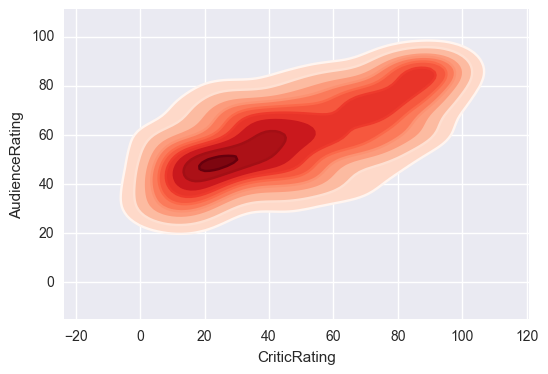

In [118]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False, cmap='Reds')

###TIPS
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds')

In [119]:
#Working with Subplots()
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

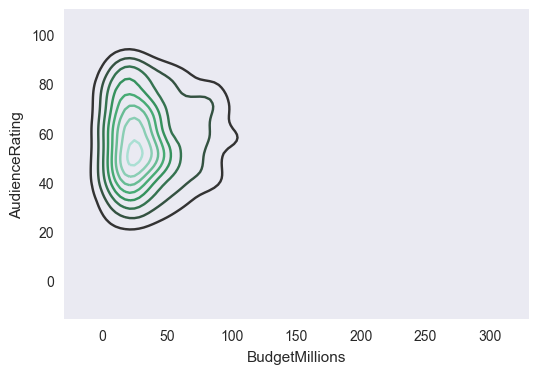

In [121]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

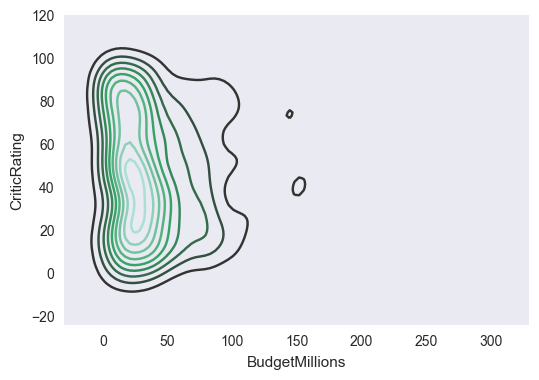

In [122]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

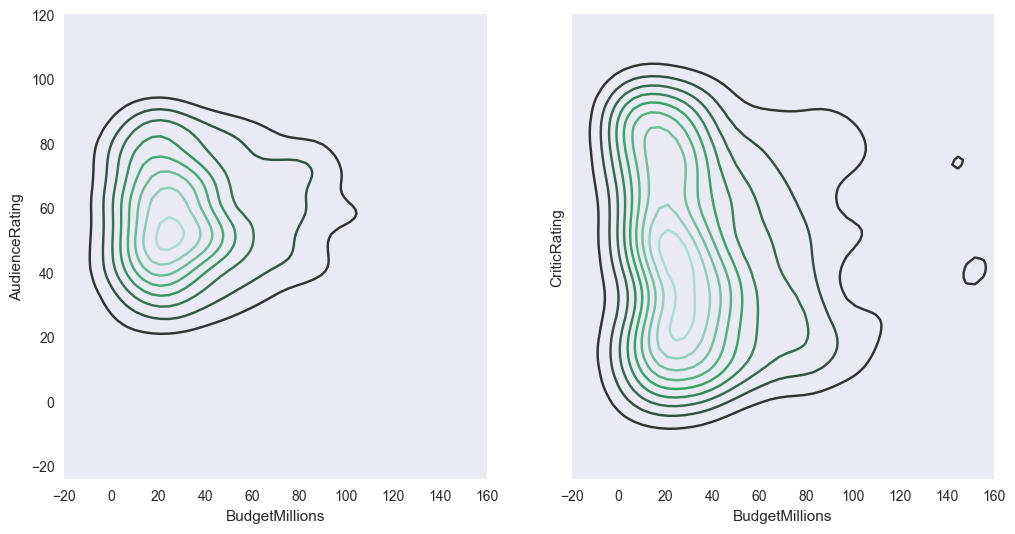

In [139]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

In [140]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000293274DC6A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002932701E748>], dtype=object)

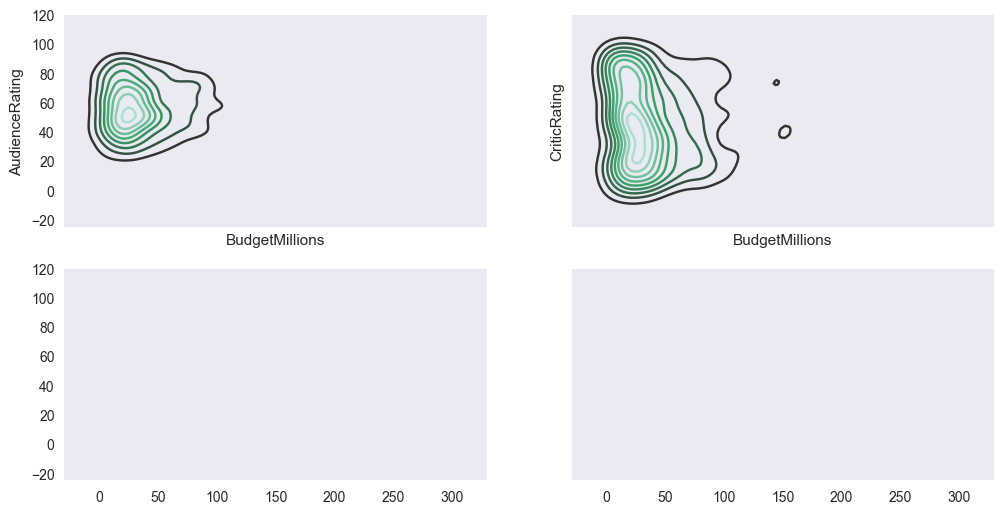

In [141]:
f, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])